In [2]:
import seaborn as sns
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
algo_list = ['DE', 'GA']
enemy_list = [1, 2, 3]
irun = 10

data = {
    'GA': {enemy: {'best_fitness': {}, 'mean_fitness': {}, 'std_fitness': {}} for enemy in enemy_list},
    'DE': {enemy: {'best_fitness': {}, 'mean_fitness': {}, 'std_fitness': {}} for enemy in enemy_list}
}

with open('./avg/data_f.pkl', 'rb') as file:
    f = pickle.load(file)

    for algo in algo_list:
        for enemy in enemy_list:
            data[algo][enemy]['best_fitness'] = pd.DataFrame.from_dict(f[algo][enemy]['best_fitness']).mean(axis = 1)            
            data[algo][enemy]['mean_fitness'] = pd.DataFrame.from_dict(f[algo][enemy]['mean_fitness']).mean(axis = 1)           
            data[algo][enemy]['std_fitness'] = pd.DataFrame.from_dict(f[algo][enemy]['std_fitness']).mean(axis = 1)            



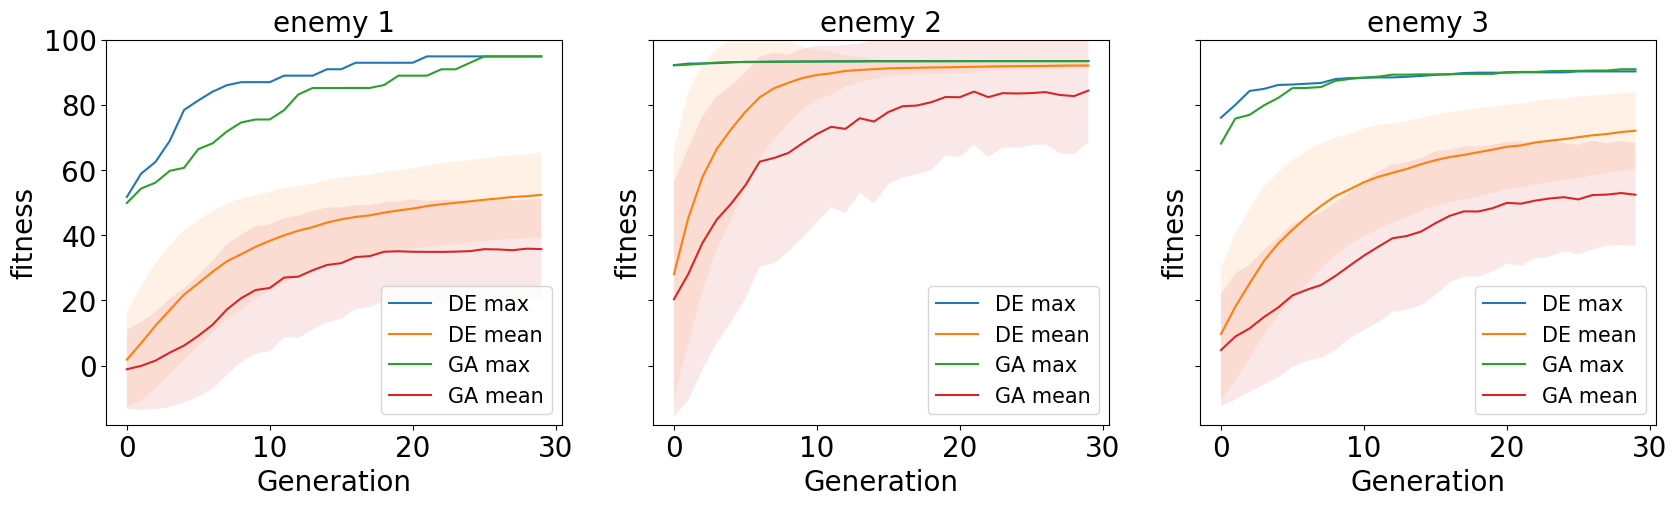

In [46]:
font_size = 20

figs, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5), sharex = True, sharey = True)

generation = 30

cur = -1
for ax in axes.flatten():
    cur += 1
    enemy = enemy_list[cur]

    for algo in algo_list:
        ax.plot(range(generation), data[algo][enemy]['best_fitness'], label = '{} max'.format(algo))
        last = ax.plot(range(generation), data[algo][enemy]['mean_fitness'], label = '{} mean'.format(algo))
        ax.fill_between(range(generation), 
                        data[algo][enemy]['mean_fitness'] - data[algo][enemy]['std_fitness'], 
                        data[algo][enemy]['mean_fitness'] + data[algo][enemy]['std_fitness'],
                        facecolor = last[0].get_color(),
                        alpha = 0.1)
        ax.set_title('enemy {}'.format(enemy), fontsize = font_size)
        ax.set_ylim(ymax = 100)
        ax.set_xlabel('Generation', fontsize = font_size)
        ax.set_ylabel('fitness', fontsize = font_size)
        # ax.set_yscale('log')
        ax.tick_params(axis = 'x', labelsize = font_size)
        ax.tick_params(axis = 'y', labelsize = font_size)
        ax.legend(fontsize = 15)


In [156]:
F = [[]] * 9
for i in range(1, 9):
    with open('./{}/data_f.pkl'.format(i), 'rb') as file:
        f = pickle.load(file)

        for idx in range(len(f)):
            f[idx]['ite'] = [i for i in range(f[idx]['mean'].shape[0])]
        
        frames = [pd.DataFrame.from_dict(D) for D in f]
        F_tmp = pd.concat(frames)
        F[i] = F_tmp

In [157]:
F

[[],
          mean        std        max  ite
 0   -1.297251  12.964783  57.073074    0
 1    2.715448  16.845419  57.269900    1
 2    8.824989  20.087228  66.269900    2
 3   16.565882  20.908075  66.269900    3
 4   25.913812  17.325081  66.269900    4
 ..        ...        ...        ...  ...
 95  94.902734   0.028226  94.918596   95
 96  94.910004   0.022226  94.918596   96
 97  94.918596   0.000000  94.918596   97
 98  94.918596   0.000000  94.918596   98
 99  94.918596   0.000000  94.918596   99
 
 [1000 rows x 4 columns],
          mean        std        max  ite
 0   16.562571  33.852146  91.747727    0
 1   39.609722  36.755546  91.779644    1
 2   67.821414  20.200696  93.202788    2
 3   83.148149   7.571913  93.202788    3
 4   88.060681   3.490056  93.202788    4
 ..        ...        ...        ...  ...
 95  93.688012   0.000000  93.688012   95
 96  93.688012   0.000000  93.688012   96
 97  93.688012   0.000000  93.688012   97
 98  93.688012   0.000000  93.688012   98
 

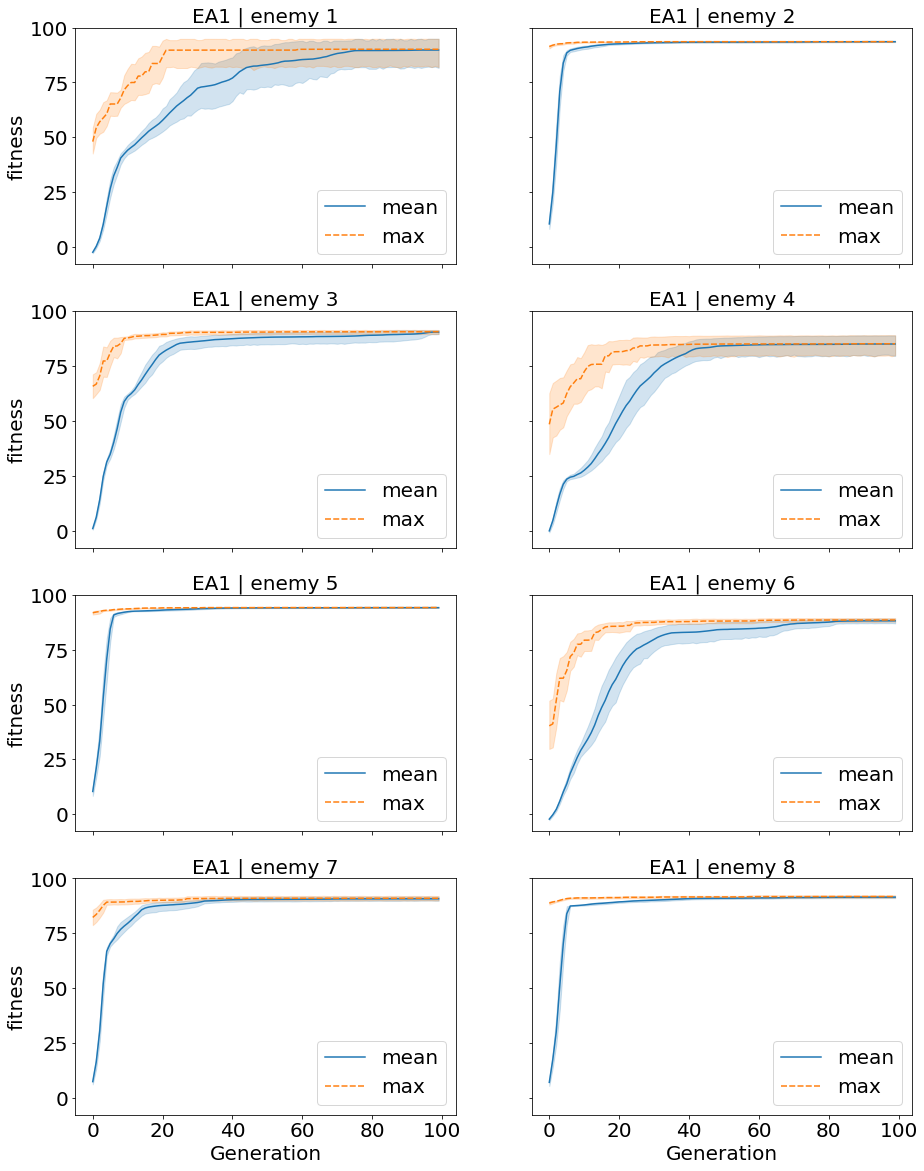

In [158]:
font_size = 20

figs, axes = plt.subplots(nrows = 4, ncols=2, figsize = (15, 20), sharex = True, sharey = True)

tot = 0
for ax in axes.flatten():
    tot += 1
    sns.lineplot(data = F[tot][['mean', 'max']], ax = ax)
    ax.set_title('EA1 | enemy {}'.format(tot), fontsize = font_size)
    # ax.set_xlim(xmax = 200)
    ax.set_ylim(ymax = 100)
    ax.set_xlabel('Generation', fontsize = font_size)
    ax.set_ylabel('fitness', fontsize = font_size)
    # ax.set_yscale('log')
    ax.tick_params(axis = 'x', labelsize = font_size)
    ax.tick_params(axis = 'y', labelsize = font_size)
    ax.legend(fontsize = font_size)


In [159]:
figs.savefig('fitness_basic.pdf', bbox_inches = 'tight')

In [151]:
frames = []
for i in range(1, 9):
    with open('./{}/data_score.pkl'.format(i), 'rb') as file:
        f = pickle.load(file)
        
        f['enemy'] = [i] * 10

        frame = pd.DataFrame.from_dict(f)
        
        frames.append(frame)

F = pd.concat(frames)

In [152]:
F

,score,enemy
0,100.0,1
1,30.0,1
2,100.0,1
3,100.0,1
4,100.0,1
...,...,...
5,67.0,8
6,72.4,8
7,80.2,8
8,82.0,8


No handles with labels found to put in legend.


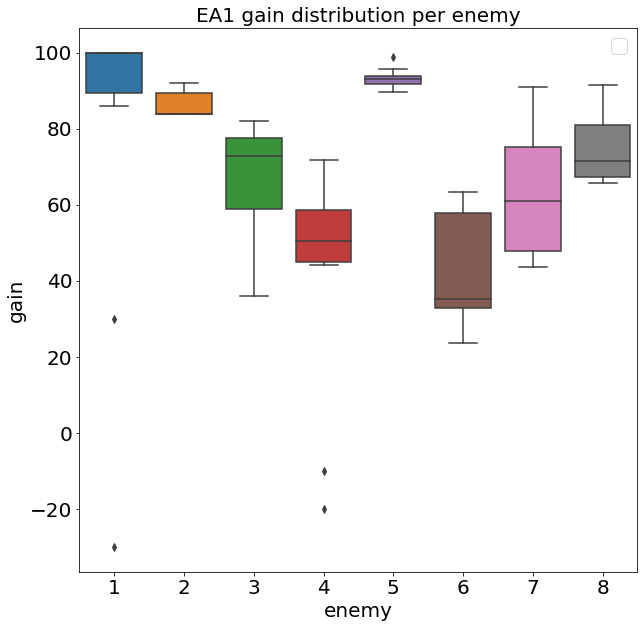

In [154]:
font_size = 20

figs, ax = plt.subplots(nrows = 1, ncols=1, figsize = (10, 10), sharex = True, sharey = True)

sns.boxplot(data = F, x = 'enemy', y = 'score', ax = ax)
ax.set_title('EA1 gain distribution per enemy'.format(tot), fontsize = font_size)
# ax.set_xlim(xmax = 200)
# ax.set_ylim(ymax = 100)
ax.set_xlabel('enemy', fontsize = font_size)
ax.set_ylabel('gain', fontsize = font_size)
# ax.set_yscale('log')
ax.tick_params(axis = 'x', labelsize = font_size)
ax.tick_params(axis = 'y', labelsize = font_size)
ax.legend(fontsize = font_size)


In [155]:
figs.savefig('gain_basic.pdf', bbox_inches = 'tight')